# Assignment 1
## Problem 1

### Import necessary libraries

First, we need to import basic libraries such as Pandas, NumPy, Seaborn, Matplotlib, Plotly, and cufflinks.
these libraries are used accross different sections of the process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

5.18.0


In [2]:
import warnings

warnings.filterwarnings("ignore")

### load Dataset 1

in this section, dataset will be loaded using pandas read_csv method. next, the columns will be renamed, so that we can 
tell apart 'Vertical', 'Diagonal' and 'Cross' lengths.

In [3]:
df = pd.read_csv('Dataset_I.csv')
df.columns = ['Species', 'Weight', 'Vertical', 'Diagonal', 'Cross', 'Height', 'Width']
df

,Species,Weight,Vertical,Diagonal,Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Part a: 
#### Determine the number of fish species present in the dataset and analyze their distribution across each class. (Plot a bar chart too!).

to show the number of fish species, GroupBy method is used. since our dataset does not include any NaN values, the count of elements for each feature is the same. so here we only selected the count of one feature such as Weight to preview the number of each species

In [4]:
pd.DataFrame(df.groupby('Species')['Weight'].count())

,Weight
Species,
Bream,35
Parkki,11
Perch,56
Pike,17
Roach,20
Smelt,14
Whitefish,6


Next, a bar chart is plotted using plotly
We can see that Perch and Bream have the highest count among our dataset and WhiteFish and Parkiki have the lowest

In [5]:
df.groupby('Species')['Weight'].count().iplot(kind = 'bar')

### Part b:
#### Find the relationship between the following features: (weight vs. width) ,(weight vs. diagonal length), (cross length vs. vertical length). Use scatter diagrams to visualize the data and provide a detailed explanation of your findings.

in the following charts, the relationship between desired features are plotted using plotly. the express tool from plotly makes the chart interactive and easy for further exploration
besides plotting desired features versus each other, they were also seperated by based on their Species. so that we can analyze the characteristics of each Species.
The result of this analyze will be presented below the charts

In [6]:
import plotly.express as px

fig = px.scatter(df, y='Weight', x='Width', color='Species' , title='Weight vs Width')
fig.show()

##### Result: 
##### In the first glance, we can see that Weight has a non linear relation with Width length. We may consider it as a 2nd or 3rd order relation 
##### Next, By looking at the Species, We can conclude the following results:
* 'Smelt' fish are smaller than the others, so they have less weigth and smaller Width length. Their Width range from 1 to 2.5 *
* 'Perch' fish have a wide range of sizes. their Width range from 1 to 8 , while their Weight range from 6 to 1100
* 'Pike' fish is a medium to large sized fish. its Width range from 3 to 7.5, while their weight range from 200 to 1500
* 'Parkiki' is a small sized fish, with the Width of 2 to 4.5, and Weight of 50 to 300
* 'WhiteFish', which have very few samples among dataset have aWidth between 4 to 7,  and a Weigth in range of 300 to 1000
* 'Rouch' is considered to be a small sized fish, with the width of 2 to 5, and weigth of 50 to 400
* 'Bream' is a medium sized fish, with the width of 4 to 7 and Weight of 200 to 1000

In [7]:
fig = px.scatter(df, y='Weight', x='Diagonal', color='Species' , title='Weight vs Diagonal length')
fig.show()

##### Result: 
##### Just as shown in the distribution of Weigth vs Width, it is observed that Weigth has also a non linear relation with Diagonal Length.
##### Next, By exploring each Species we conclude that:
* 'Pike' fish has a greater Diagonal length to Weight ratio, which means this type of fish is long and narrower than the others


In [8]:
fig = px.scatter(df, y='Cross', x='Vertical', color='Species', title='Cross lenght vs Vertical length')
fig.show()

##### Result: 
##### Unlike the two previous diagrams, we may conclude that Cross Length has a linear relation with Vertical Length.

### Part c:
##### Develop a simple linear regression model for (cross length vs. vertical length). Fit the model and assess its performance using the mean squared error (MSE) and mean absolute error (MAE) metrics. Compare and plot the results.

First, the input and output data is defined. The input, which is 'Vertical' is stored as X1 and the output which is 'Cross' is stored as Y1

Next, this data is seperated to train and test data using sklearn library.
finally, a Linear Regression model is fit to train data. 

* Important note: Since in this part we had only one feature, the input data had to be reshaped to match the input format of Linear Regression method.

After fitting the model, its constants which are Weight of features and the bias value are stored as 'coef_' and 'intercept_'.

In [9]:
X1 = df['Vertical']
Y1 = df['Cross']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3 , random_state=101)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1),y_train)

# The coefficients
print('Coefficients: \n', model.coef_)
print('intercept: \n', model.intercept_)

Coefficients: 
 [1.15362994]
intercept: 
 1.0212673228352038


In the following section, Metrics are imported from sklearn package and three measurements MAE, MSE and RMSE are calculated

In [10]:
from sklearn import metrics

predictions = model.predict( np.array(X_test).reshape(-1,1))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1205663200084255
MSE: 1.8460614768618697
RMSE: 1.358698449569245


In the final section of this part, the plot of Actual vs Predicted values is presented. The red line indicate correct answers and the blue dots indicate predicted values. 
We may conclude that the line is fit satisfyngly to the data and the model is capable of predicting Cross value by a given Vertical value

Text(0.5, 1.0, 'Cross length vs Vertical length')

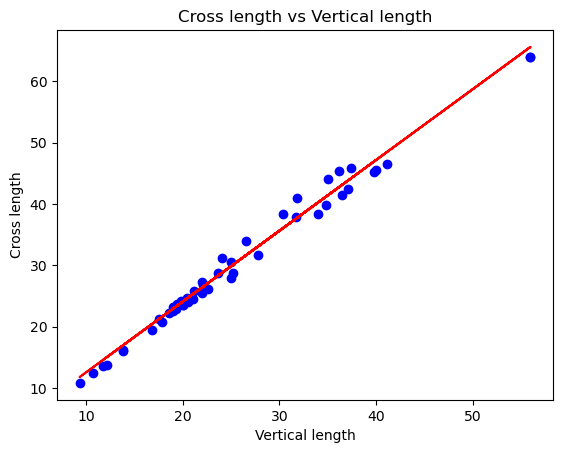

In [11]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, model.coef_*X_test + model.intercept_, '-r')
plt.xlabel("Vertical length")
plt.ylabel("Cross length")
plt.title('Cross length vs Vertical length')

### Part d:
##### Identify the features that have the most significant impact on fish weight and choose three of these features for further evaluation. Develop a multiple linear regression model to assess the influence of these features on fish weight and evaluate the model using

To show the influence of each feature in predicting the Weigth of a given fish, first we need to find the correlation between features of dataset and Weigth. By examining these values, we will be able to choose only the features with higher correelation value as our inout features for regression models.

In [12]:
df.columns

Index(['Species', 'Weight', 'Vertical', 'Diagonal', 'Cross', 'Height',
       'Width'],
      dtype='object')

*Important Note:*
Since the Species column in our dataset is a categorical column and it contains valuable information about fish, we may not drop this column. so One Hot Encoding is utilized to transform this column into numerical features that consequently we can include them in our analysis.
at the end of the proceess, the correlation value of each of these new features are summed up and their mean is calculated, indicating a single number to show the correlation of species with Weigth

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['Species'])
# Display the resulting DataFrame
df_encoded

,Weight,Vertical,Diagonal,Cross,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [14]:
correlations = df_encoded.corr()['Weight']
species_correlation = correlations.filter(like='Species').abs().mean()
correlations.drop(['Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish'], inplace=True)

# Create a new Series with the species correlation
species_corr_series = pd.Series(species_correlation, index=['species_correlation'])

# Concatenate the two Series
all_correlations = pd.concat([correlations, species_corr_series])

# Display the correlation coefficients
print(all_correlations)


Weight                 1.000000
Vertical               0.915712
Diagonal               0.918618
Cross                  0.923044
Height                 0.724345
Width                  0.886507
species_correlation    0.218461
dtype: float64


As we can see, the features 'Vertical' ,'Diagonal' and 'Cross' have the highest correlation with our desired parameter Weight.
So we just include them as our input features to multiple linear regression model

Having the most important features identified, the input and output dataframes are stored as below:

In [15]:
X2 = df[['Vertical', 'Diagonal', 'Cross']]
Y2 = df['Weight']

In the following section, input data is seperated to train and test data, and later, a linear regression model is fit to train data. we can access the Coefficients and Intercept of the model using corresponding methods of the model

In [16]:
model = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2 , random_state=101)

model.fit(X_train,y_train)
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [-39.61009838  40.85056022  23.40081276]
Intercept:  -459.15482470325503


Next, test data is given to the trained model and predicts the corresponding Weigth of each input data.
In the presented plot, the Actual versus Predicted values are shown.


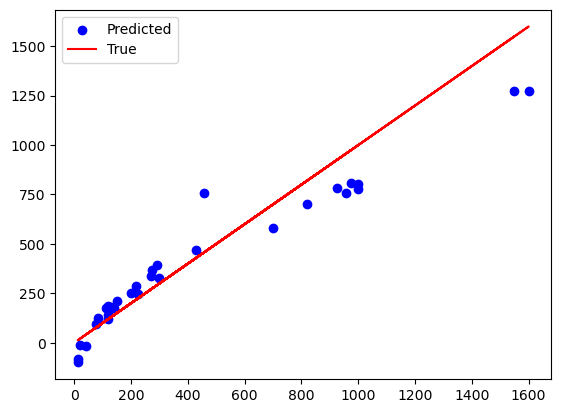

In [17]:
plt.scatter(y_test , model.predict(X_test) , color = 'blue' , label = 'Predicted')
plt.plot(y_test , y_test , color = 'red' , label = 'True')
plt.legend()

In [18]:
predictions2 = model.predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 102.10352455596949
MSE: 17646.012270349038
RMSE: 132.8382936895421


##### Result:
* By considering the Metric values and the diagram, we can see that the model had poor performance in predicting large values of fish weigths, just as very small weigths. This is a logical result, since as presented in part b, we observed that there are non linear relations between Vertical, Croos and Diagonal lengths. In this multiple linear regression model, this nonlinear behaviour was not considered

### Part e:
##### Develop a polynomial regression model for (weight vs. width), as well as (weight vs. height).

##### (weight vs. width)

Input and Output data are stored in new dataframes named X3 and Y3.

In [19]:
X3 = df['Width']
Y3 = df['Weight']

In the following section, we first define a 2nd degree polynomial as our model, then the input data is divided into train and test data. 
* Important note: Since in this part we had only one feature, the input data had to be reshaped to match the input format of Linear Regression method.
The polynimial function is applied to the input features with predefined constants. this makes new features for each of the degrees of input data.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

train_x, test_x , train_y , test_y = train_test_split(X3,Y3,test_size=0.2,random_state=4)
train_x_poly = poly.fit_transform(np.array(train_x).reshape(-1,1))
test_x_poly = poly.fit_transform(np.array(test_x).reshape(-1,1))

In the following section, a linear regression model is defined and fit to the data.

In [21]:
model = linear_model.LinearRegression()

model.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [  0.         -11.88933321  22.45259053]
Intercept:  -57.79725688019863


Finally, the Actual vs Predicted diagram is plotted. the red line, is the predicted polynomial function and blue dots indicate true values

Text(0.5, 1.0, 'Polynomial Weight vs Width model')

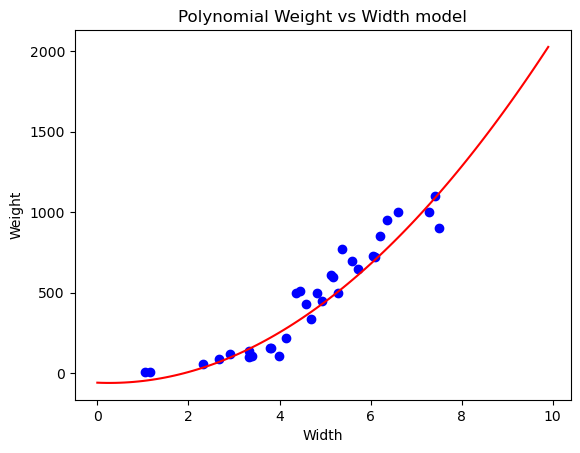

In [22]:
plt.scatter(test_x , test_y, color = 'blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_+ model.coef_[1]*XX + model.coef_[2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Polynomial Weight vs Width model')

In [23]:
predictions3 = model.predict(test_x_poly)

print('MAE:', metrics.mean_absolute_error(test_y, predictions3))
print('MSE:', metrics.mean_squared_error(test_y, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions3)))

MAE: 81.8972986743567
MSE: 10922.507827726185
RMSE: 104.51080244513571


##### Result: 
Based on the diagram above and values of metrics, we can conclude that the model is capable of predicting the value of Weight. 
Meanwhile, the values of metrics looks higher than metrics calculated in predicting Cross vs Vertical model. This is due to the fact that the scale of output data is different

##### (weight vs. height)

In [24]:
X4 = df['Height']
Y4 = df['Weight']

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
train_x, test_x , train_y , test_y = train_test_split(X4,Y4,test_size=0.2,random_state=4)
train_x_poly = poly.fit_transform(np.array(train_x).reshape(-1,1))
test_x_poly = poly.fit_transform(np.array(test_x).reshape(-1,1))

In [26]:
model = linear_model.LinearRegression()

model.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [  0.         100.92417358  -1.96346368]
Intercept:  -305.9932338395084


Text(0.5, 1.0, 'Polynomial Weight vs Width model')

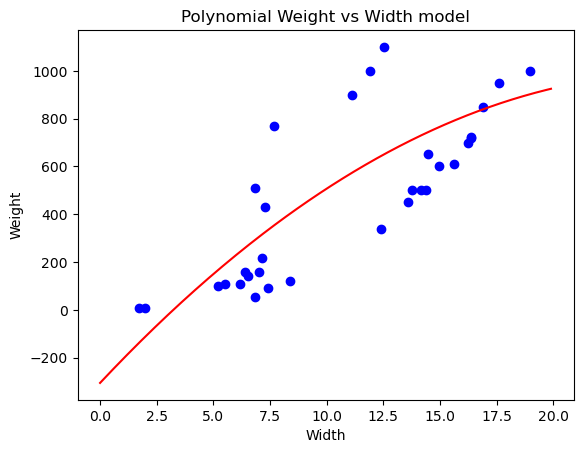

In [27]:
plt.scatter(test_x , test_y, color = 'blue')

XX = np.arange(0.0, 20.0, 0.1)
yy = model.intercept_+ model.coef_[1]*XX + model.coef_[2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel('Width')
plt.ylabel('Weight')
plt.title('Polynomial Weight vs Width model')

In [28]:
predictions4 = model.predict(test_x_poly)

print('MAE:', metrics.mean_absolute_error(test_y, predictions4))
print('MSE:', metrics.mean_squared_error(test_y, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions4)))

MAE: 183.29734463555752
MSE: 44800.22797956126
RMSE: 211.66064343557417
